In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json

In [2]:
df_primera_tanda = pd.read_pickle("../pickles/cuentalo_json_con_pais_ciudad_limpios.pkl")

In [65]:
df_extension = pd.read_pickle("../pickles/missing_tweets_con_pais_ciudad_limpios.pkl")

In [4]:
df_full = pd.concat([df_primera_tanda,df_extension])

In [38]:
df_full.to_pickle("../pickles/dataset_previo_final.pkl")

# tweets mas retuiteados

In [5]:
grouped_retweets=df_full.groupby('parent_id')

In [6]:
retweeted_ids_with_maxcounts=grouped_retweets['retweet_count'].max()

In [7]:
corte=2500
most_rts=df_full[df_full.id.isin(retweeted_ids_with_maxcounts[retweeted_ids_with_maxcounts>corte].index)].sort_values('retweet_count',ascending=False)
print ("Tweets con mas de ",corte,"retweets:",len(most_rts))
most_rts.full_text=most_rts.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts.parent_full_text=most_rts.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts[['id','user_followers_count','retweet_count','favorite_count','user_screen_name']]

Tweets con mas de  2500 retweets: 154


,id,user_followers_count,retweet_count,favorite_count,user_screen_name
tweet_id,,,,,
990201907456208896,990201907456208896,1148,54705,71796,martolius
991217730601848834,991217730601848834,2543,44150,63430,micaserrano23
991464409825505280,991464409825505280,2238,33892,34689,viickymonti
990818114995703808,990818114995703808,591,22633,32814,rg_vianca
990775116807229440,990775116807229440,718,20483,58393,sabri_barra
990779462273953794,990779462273953794,1344,17764,63256,cchaconj
990325049893801984,990325049893801984,5825,17472,30484,AlejandraTuk
991034153268383751,991034153268383751,761,17195,51220,santygom3z
990864702011006977,990864702011006977,386,16094,23308,victoriaEacosta


In [8]:
most_rts['id']=most_rts['id'].astype(str)
most_rts.to_excel("../intermediate_data/tweets_mas_rt.xls")

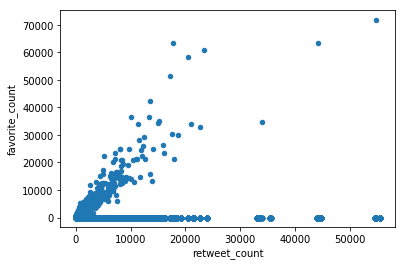

In [9]:
df_full.favorite_count=df_full.fillna(-1).favorite_count.astype(np.int32)
df_full[['favorite_count','retweet_count']].plot.scatter(x='retweet_count',y='favorite_count')

# Barcelona

In [10]:
# rts en barcelona 
rts_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type=='retweet')].copy()
rts_bcn.full_text = rts_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
rts_bcn.parent_full_text=rts_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#rts_bcn.to_excel("retweets_en_barcelona.xlsx")

In [11]:
# tweets originales de usuarios en barcelona
tweets_de_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type!='retweet')].copy()
tweets_de_bcn.full_text = tweets_de_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
tweets_de_bcn.parent_full_text=tweets_de_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#tweets_de_bcn.to_excel("tweets_de_barcelona.xlsx")

In [12]:
# ids de los tweets originales de Barcelona, a ver cuales tenemos en la DB
ids_retweeteds_from_barcelona = df_full[df_full.parent_ciudad_clean=='Barcelona'][['id','parent_id']].groupby('parent_id').count().sort_values(by='id',ascending=False).index.values

In [84]:
df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_favorite_count,parent_full_text,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_quote_count,parent_retweet_count,parent_time_zone,parent_user_created_at,parent_user_followers_count,parent_user_id,parent_user_name,parent_user_screen_name,parent_user_statuses_count,place,quote_count,retweet_count,time_zone,tweet_type,user_created_at,user_followers_count,user_id,user_name,user_screen_name,user_statuses_count,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
989943909315940353,None,2018-04-27 19:06:34,10560,Tengo 32 años y me despierto con miedo cuando ...,989943909315940353,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,4621,Athens,original,2011-05-09 06:51:46,765,295537621,Paula Borja,pau_borja,1912,Barcelona,España,9.000,NaN,NaN,NaN
990160880682889217,None,2018-04-28 09:28:44,5178,Sabéis que tienen en común todos los tíos que ...,990160880682889217,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2367,None,original,2018-03-23 23:11:27,2401,977321957912993792,Aka bxrgerqueen,_chocoqueen,2954,Barcelona,España,4.000,NaN,NaN,NaN
989864640887902209,None,2018-04-27 13:51:35,5360,"Mi madre me explicaba que en su ciudad, cuando...",989864640887902209,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2323,Pacific Time (US & Canada),original,2014-01-27 11:14:49,17299,2313471692,Ana Bolena,mantonieta1536,52470,Barcelona,España,9.000,NaN,NaN,NaN
989952859176349696,None,2018-04-27 19:42:08,5224,Todos los hombres hemos cometido algún tipo de...,989952859176349696,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1732,Greenland,original,2009-12-03 13:05:11,59395,94324983,Fonsi Loaiza,FonsiLoaiza,79054,Barcelona,España,19.500,NaN,NaN,NaN
990350573215059968,None,2018-04-28 22:02:31,5143,Me escribís algunas angustiadas porque no que...,990350573215059968,-999.0,Málaga - Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1429,Greenland,original,2009-08-19 23:53:57,26918,67165437,Ana I.Bernal-Triviño,anaisbernal,121592,Barcelona,España,19.500,NaN,NaN,NaN
991622597933780992,None,2018-05-02 10:17:05,951,El retrógrado Alfonso Ussía recibe hoy la meda...,991622597933780992,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,953,Greenland,original,2009-12-03 13:05:11,59732,94324983,Fonsi Loaiza,FonsiLoaiza,79149,Barcelona,España,19.500,NaN,NaN,NaN
989983536777236482,None,2018-04-27 21:44:02,2126,¿Y cuántas veces habéis acabado de follar solo...,989983536777236482,-999.0,Barcelona.,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,938,Pacific Time (US & Canada),original,2016-06-18 18:10:41,3173,744230870937141248,Judit.,femilinda_,30315,Barcelona,España,9.000,NaN,NaN,NaN
990285456494522368,None,2018-04-28 17:43:46,1681,"18 años, volvía de fiesta, un hombre la llama ...",990285456494522368,-999.0,"Barcelona, España",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,877,None,original,2017-08-29 12:37:04,13,902510409269305348,LV,lauravivesf,6,Barcelona,España,12.000,NaN,NaN,NaN
990217327609294849,None,2018-04-28 13:13:02,1260,Es sorprendente que muchas que leemos #Cuental...,990217327609294849,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,693,Madrid,original,2011-10-29 14:57:48,3050,400766668,Her,_hherol,50559,Barcelona,España,4.000,NaN,NaN,NaN


In [13]:
df_bcn = df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

In [14]:
df_bcn.retweet_count.sum()

43377

# Locations de tweets

In [15]:
contenido = df_full[df_full.tweet_type!='retweet']
retweets = df_full[df_full.tweet_type=='retweet']

In [16]:
cuenta_pais = pd.DataFrame()
cuenta_pais['originales'] = contenido.groupby('pais_clean')['id'].count().sort_values(ascending=False)
total = cuenta_pais['originales'].sum()
cuenta_pais['porcentaje'] = 100*cuenta_pais['originales']/total
cuenta_pais.head(15)

,originales,porcentaje
pais_clean,,
España,34171,38.054881
Argentina,26703,29.738067
Colombia,6683,7.442591
México,4459,4.965811
Chile,3599,4.008063
Estados Unidos,1907,2.123750
Perú,1581,1.760697
Venezuela,1403,1.562465
Uruguay,1370,1.525714


,originales,porcentaje
pais_clean,,
España,29088,36.925889
Argentina,24243,30.775383
Colombia,5536,7.027699
México,4125,5.236499
Chile,3266,4.146038
Estados Unidos,1682,2.135222
Perú,1388,1.762003
Uruguay,1253,1.590626
Venezuela,1237,1.570315


In [17]:
cuenta_pais = pd.DataFrame()
cuenta_pais['retweets'] = retweets.groupby('pais_clean')['id'].count().sort_values(ascending=False)
total = cuenta_pais['retweets'].sum()
cuenta_pais['porcentaje'] = 100*cuenta_pais['retweets']/total
cuenta_pais.head(15)

,retweets,porcentaje
pais_clean,,
Argentina,491751,44.747105
España,272911,24.833660
Chile,54200,4.931954
México,52392,4.767434
Colombia,48257,4.391168
Uruguay,24394,2.219743
Estados Unidos,21773,1.981244
Puerto Rico,18045,1.642013
Venezuela,16452,1.497057


In [93]:
cuenta_pais = pd.DataFrame()
cuenta_pais['retweets'] = retweets.groupby('pais_clean')['id'].count().sort_values(ascending=False)
cuenta_pais['originales'] = contenido.groupby('pais_clean')['id'].count().sort_values(ascending=False)
cuenta_pais['porcentaje_originales'] = 100*cuenta_pais['originales']/cuenta_pais['originales'].sum()
cuenta_pais['porcentaje_retweets'] = 100*cuenta_pais['retweets']/total

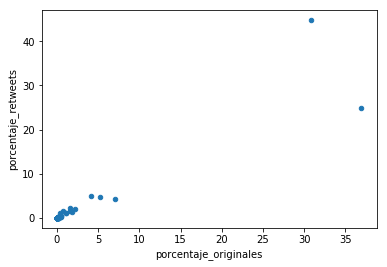

In [94]:
cuenta_pais.plot.scatter(x='porcentaje_originales',y='porcentaje_retweets')

In [30]:
(cuenta_pais[cuenta_pais.retweets>1000]['porcentaje_originales']/cuenta_pais[cuenta_pais.retweets>1000]['porcentaje_retweets']).sort_values(ascending=False)

pais_clean
Francia           1.694244
Guatemala         1.683377
Reino Unido       1.639173
El Salvador       1.609763
Colombia          1.600478
España            1.486986
Perú              1.354152
Italia            1.144068
Panamá            1.133099
México            1.098431
Costa Rica        1.080201
Estados Unidos    1.077759
Canadá            1.059440
Venezuela         1.048975
Cuba              1.045924
Ecuador           0.985079
Filipinas         0.953050
Brasil            0.898843
Chile             0.840680
Japón             0.822065
San Martín        0.733718
Uruguay           0.716609
Argentina         0.687789
Nicaragua         0.484878
Puerto Rico       0.418268
Paraguay          0.289467
dtype: float64

# Grabar muestra de tweets aleatorios para gente del grupo

In [122]:
NUMERO_DE_TWEETS_POR_PERSONA = 5000
# tweets originales solamente
tweets_originales = df_full[(df_full.tweet_type=='original')].copy()
tweets_originales.full_text = tweets_originales.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
tweets_originales.id = tweets_originales.id.apply(str)
#people = ['Patricio','Laura','Maria','Diana','Guillermo','Sol','Luz','David','Feliu','Artur','Irene','Carlos (C)','Carlos (G)','Fer','Juan','Camilo']
#people.sort()
people = [str(x) for x in range(1,6)]
writer = pd.ExcelWriter('categorization_externa.xlsx')
for p in people:
    subset = tweets_originales.sample(n=NUMERO_DE_TWEETS_POR_PERSONA)
    subset=subset[['id','user_name','full_text']]
    subset.to_excel(writer,sheet_name=p)
writer.save()

/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/1PbotmoCe6%20@%20' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/mjDqGvtqfy..' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


# Export to JSON for vis

In [18]:
summary = df_full[df_full.tweet_type!='retweet'][['id','parent_id','created_at','pais_clean','user_followers_count','retweet_count','full_text','tweet_type']].copy()
# cambiar enters por puntos
summary.full_text=summary.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#summary.parent_full_text=summary.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
summary.head()

,id,parent_id,created_at,pais_clean,user_followers_count,retweet_count,full_text,tweet_type
tweet_id,,,,,,,,
990380122082611200,990380122082611200,0,2018-04-28 23:59:56,NaN,78,0,17 años.Vuelvo a casa con miedo. Se me acerca ...,original
990380087559315456,990380087559315456,990379489371807744,2018-04-28 23:59:47,NaN,173,1,Cuando cortamos estaba tan destrozada que llev...,reply
990380024703447040,990380024703447040,0,2018-04-28 23:59:32,NaN,223,0,#Cuéntalo como hacéis las lentejas?,original
990380009549434882,990380009549434882,0,2018-04-28 23:59:29,NaN,1196,0,un grupo de amigas nos reunimos y salio la pla...,original
990380001202761728,990380001202761728,0,2018-04-28 23:59:27,España,309,3,Volvía a casa de la universidad. En el autobús...,original


In [19]:
mindate=summary.created_at.min()
maxdate=summary.created_at.max()
summary['x']=summary.created_at.apply(lambda x: (x-mindate).total_seconds())

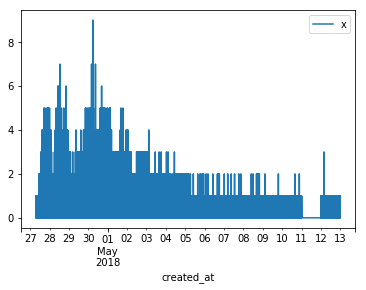

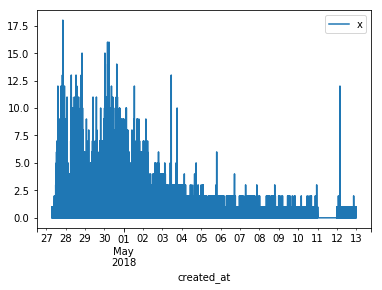

In [20]:
summary[['x','created_at']].set_index('created_at').resample('1s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('5s').count().plot()

In [21]:
summary = summary.sort_values(by='created_at',ascending=True)

In [22]:
#summary.groupby('x').count()
delta=60 #seconds, so I have 1440 groups per day
summary['groups_linear']=(summary['x']/delta).astype(int)
summary['groups_circle']=summary['groups_linear']%1440

In [23]:
summary.groupby('groups_circle').count().describe()

,id,parent_id,created_at,pais_clean,user_followers_count,retweet_count,full_text,tweet_type,x,groups_linear
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,111.437500,111.437500,111.437500,62.356944,111.437500,111.437500,111.437500,111.437500,111.437500,111.437500
std,27.647015,27.647015,27.647015,16.911833,27.647015,27.647015,27.647015,27.647015,27.647015,27.647015
min,44.000000,44.000000,44.000000,24.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
25%,90.000000,90.000000,90.000000,50.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
50%,115.000000,115.000000,115.000000,65.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
75%,133.000000,133.000000,133.000000,75.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
max,177.000000,177.000000,177.000000,109.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000


In [24]:
summary['y_cummulative']=summary.groupby('groups_circle').transform(lambda x: np.arange(len(x)))['id']

In [27]:
summary.to_csv("originals.csv")

In [29]:
from datetime import timedelta

In [30]:
step=timedelta(0,300)
start=summary.created_at.min()
end=summary.created_at.min()+step
summary['y_centrado']=0
summary['y']=0
MAXY = 300
while(start<summary.created_at.max()):
    window=summary[(summary.created_at>=start)&(summary.created_at<end)]
    summary.loc[window.index,'y_centrado']=[ (x-MAXY/2)/MAXY for x in range(len(window.index))]
    summary.loc[window.index,'y']=[ x for x in range(len(window.index))]
    start=end
    end = min(end+step,summary.created_at.max())

In [34]:
summary['minute']=summary['created_at'].dt.round('1min')
grouped = summary[['minute','id']].groupby('minute')

In [35]:
summary['y_centrado']=grouped.transform(lambda group: [ (x-(len(group)-1)/2)/(MAXY-1) for x in range(len(group))])

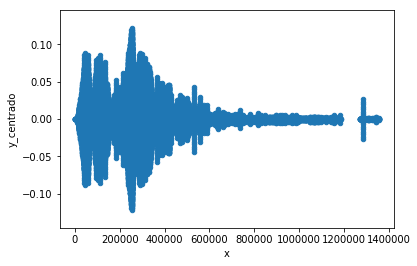

In [36]:
summary.plot.scatter(x='x',y='y_centrado')

In [37]:
summary.to_csv("originals.csv")

In [135]:
summary.to_pickle("../pickles/originals_pickle.csv")

In [129]:
probabilities = pd.read_csv("/Users/fcucchietti/Downloads/df_predicted_probs.csv")

/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,26,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
probabilities[['tweet_id','pred_1a2a_persona','pred_apoyo','pred_otros_trolls']].head()

,tweet_id,pred_1a2a_persona,pred_apoyo,pred_otros_trolls
0,990380122082611200,0.957132,0.042664,0.000205
1,990380024703447040,0.001282,0.821227,0.177491
2,990380009549434882,0.999127,0.000809,0.000064
3,990380001202761728,0.999967,0.000031,0.000002
4,990379986564669441,0.000079,0.999913,0.000007


In [53]:
prob_summary = summary.join(probabilities[['tweet_id','pred_1a2a_persona','pred_apoyo','pred_otros_trolls']].set_index('tweet_id'))

In [133]:
prob_summary.pred_1a2a_persona.isna().sum()

114660

# Formato de links entre tweets para arbol

In [109]:
retweets={}
for idx,row in summary.iterrows():
    if row.parent_id:
        if row.parent_id in retweets:
            retweets[row.parent_id].append(idx)
        else:
            retweets[row.parent_id]=[idx]

In [110]:
alltweets=[]
for idx,row in summary.iterrows():
    tweet={"tweetId": idx,"position": [row.x,row.y]}
    if idx in retweets:
        tweet['listOfRetweets'] = [{"tweetId": t} for t in retweets[idx]]
    else:
        tweet['listOfRetweets'] = []
    alltweets.append(tweet)

In [78]:
import json

In [111]:
a=json.dumps(alltweets)
fo=open("./summary_xy.json",'w')
fo.write(a)

15957054

In [26]:
summary.columns

Index(['id', 'parent_id', 'created_at', 'pais_clean', 'user_followers_count',
       'retweet_count', 'full_text', 'tweet_type', 'x', 'groups_linear',
       'groups_circle', 'y_cummulative'],
      dtype='object')

In [24]:
len(summary.pais_clean.unique())

206

In [29]:
summary.groupby('pais_clean').count().id.sort_values(ascending=False)

pais_clean
Argentina                               515994
España                                  301999
Chile                                    57466
México                                   56517
Colombia                                 53793
Uruguay                                  25647
Estados Unidos                           23455
Puerto Rico                              18586
Venezuela                                17689
Perú                                     15688
Paraguay                                 13529
Ecuador                                  12403
Costa Rica                               12343
Brasil                                    5799
Panamá                                    4686
Reino Unido                               3833
Guatemala                                 2712
Nicaragua                                 2620
Filipinas                                 2596
El Salvador                               2175
Francia                                   2087
It

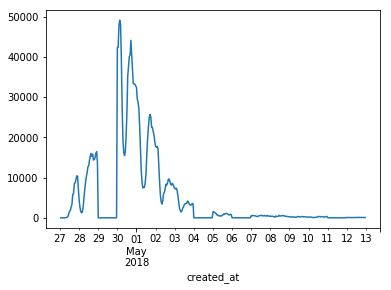

In [94]:
pd.set_option('display.max_rows', 10000)
df_full[df_full.tweet_type=="retweet"].set_index('created_at').resample('1h')['id'].count().plot()

In [90]:
df_full.tweet_type.unique()

array(['retweet', 'original', 'reply', 'quote'], dtype=object)

# Mas estadistica basica

In [71]:
NOretweets = df_full[df_full.tweet_type!='retweet']
retweets = df_full[df_full.tweet_type=='retweet']
originales = df_full[df_full.tweet_type=='original']
replies = df_full[df_full.tweet_type=='reply']
quotes = df_full[df_full.tweet_type=='quote']
quotes = df_full[df_full.tweet_type=='quote']

In [110]:
print(len(df_full.user_id.unique()),"usuarios únicos")
print("pero teniendo en cuenta los retuits que nos faltan, estimamos",int(df_extension.retweet_count.sum()/(len(retweets)/len(retweets.user_id.unique()))),"usuarios mas")


611089 usuarios únicos
pero teniendo en cuenta los retuits que nos faltan, estimamos 179583 usuarios mas


In [108]:
print(len(df_full)+df_extension.retweet_count.sum(),"participaciones")

2758789 participaciones


In [74]:
print(len(originales),"tuits originales,")
print(len(replies),"respuestas,")
print(len(quotes),"retuits con comentario,")
print("Sumando ",len(quotes)+len(replies)+len(originales),"tuits con contenido escrito, mas")
print(len(retweets),"retuits")
print("todavia nos faltan descargar",df_extension.retweet_count.sum(),"retuits")
print("para un total de ",len(retweets)+df_extension.retweet_count.sum(),'retuits')

128396 tuits originales,
22546 respuestas,
9528 retuits con comentario,
Sumando  160470 tuits con contenido escrito, mas
1973203 retuits
todavia nos faltan descargar 625116 retuits
para un total de  2598319 retuits


### Participacion por pais
Con un 50% de los tuits geolocalizados

In [99]:
count_by_country = df_full[['id','pais_clean']].groupby('pais_clean').count()
count_by_country.columns = ['sobre_total']
retweets_by_country = retweets[['id','pais_clean']].groupby('pais_clean').count()
count_by_country['sobre_retweets'] = retweets_by_country['id']
NOretweets_by_country = NOretweets[['id','pais_clean']].groupby('pais_clean').count()
count_by_country['sobre_contenido'] = NOretweets_by_country['id']

In [121]:
total_paises = count_by_country.sum()
print(len(count_by_country[count_by_country.sobre_total>100]),"paises con mas de 10 participaciones")

69 paises con mas de 10 participaciones


In [102]:
(100*count_by_country.sort_values(by='sobre_total',ascending=False)/total_paises).head(10)

,sobre_total,sobre_retweets,sobre_contenido
pais_clean,,,
Argentina,43.613375,44.747105,29.738067
España,25.832345,24.833660,38.054881
Chile,4.862166,4.931954,4.008063
México,4.782419,4.767434,4.965811
Colombia,4.621661,4.391168,7.442591
Uruguay,2.167319,2.219743,1.525714
Estados Unidos,1.992008,1.981244,2.123750
Puerto Rico,1.565510,1.642013,0.629218
Venezuela,1.501998,1.497057,1.562465


In [127]:
count_by_city = NOretweets[['id','ciudad_clean','pais_clean']].groupby(['pais_clean','ciudad_clean']).count()
count_by_city.columns = ['sobre_total']

In [128]:
count_by_city.sort_values(by="sobre_total",ascending=False).head(20)

sobre_total
pais_clean ciudad_clean                      
España     Madrid                        5728
Argentina  Buenos Aires                  5026
España     Barcelona                     4044
Colombia   Bogotá                        2163
México     Mexico                        1609
Argentina  Córdoba                       1563
           Rosario                       1370
España     Valencia                      1311
           Sevilla                        960
Perú       Lima                           939
Argentina  Santa Fe                       856
Chile      Santiago                       816
España     Málaga                         703
Argentina  Mendoza                        669
España     Granada                        564
Argentina  La Plata                       562
           Entre Rios                     522
           Corrientes                     511
           San Miguel de Tucumán          508
Colombia   Medellín                       464

Coincidentemente, Argentina es uno de los paises con mayor penetracion de redes sociales en latino América (https://www.bbc.co.uk/news/world-latin-america-18707517), con un 76% de usuarios activos, versus un 58% de España (https://www.statista.com/statistics/282846/regular-social-networking-usage-penetration-worldwide-by-country/)


# Quien escribe los tweets

|Quien | Estimado | Franja error|Percent|
|------|----------|-------------|-----|
|1era persona	|39941	|4075| 31,11%|
|2da persona	|11415	|2935| 8,89%|
|Apoyo	|51614	|7609|40,20%|
|Otros|	21317	|5453|16,60%|
|En contra	| 4022|	1990|3,13%|







## Que se contó
|Percent|Que se contó|Estimado	|Error	|Percent|Error|
|---|--|--|--|--|--|
|3,90%	|Asesinato  	|5006	|1619	|3,63%	|1,3%|
|5,61%	|Violacion	    |7208	|1453	|5,55%	|1,1%|
|11,20%	|Agresion sexual|14380	|3517	|10,69%	|2,7%|
|6,32%	|Maltrato	   | 8119	|3318	|6,01%	|2,6%|
|14,29%	|Acoso	       |18353	|4432	|13,78%	|3,5%|
|11,82%	|Miedo	       |15179	|6658	|10,74%	|5,2%|
|19,37%	|Asco/Rabia/Tristeza	|24872	|10079	|21,09%|	7,8%|

In [117]:
NOretweets[(NOretweets.full_text.str.len()<50)&(NOretweets.full_text.str.find("https://")>=0)].full_text

tweet_id
990379135569661953           Éramos 4 #Cuentalo https://t.co/my8n1FVzJ8
990377475371921408          #Cuéntalo #Feminism https://t.co/9OUUG9cDEe
990376159761321984         Toma ya!!\n#Cuentalo https://t.co/IeURpB20N4
990375251971227649                    #cuéntalo https://t.co/8QnGwMbSNH
990373794501025792           #Cuentalo #MeToo \nhttps://t.co/kvPTiPP3U0
990373572387508224        #cuéntalo #faqsnoesno https://t.co/KFXatGfnjM
990373260750712832                    #cuentalo https://t.co/ngk4mHIxCI
990372575128834049                    #Cuentalo https://t.co/2qK9G7v7er
990372158965731328            #Cuentalo #NoesNo https://t.co/hciKByzCmb
990371794577129472                 #Cuentalo\n\nhttps://t.co/kPetHdMc93
990371210772013057                    #Cuentalo https://t.co/lDqCpYzsRR
990370861474512899                    #Cuentalo https://t.co/B99y7vXUtl
990370104083959811                    #cuéntalo https://t.co/OaDsJQ66tH
990368978173390848          Violencia #Cuentalo https:/

In [118]:
NOretweets[(NOretweets.full_text.str.len()<30)].full_text

tweet_id
990379812362555394                       #Cuentalo
990377764388769793                     #Cuentalo 💔
990376829964955649                       #Cuéntalo
990374102652325893                       #cuéntalo
990373741074010112     Solo #Cuentalo , ya no mas!
990372420686172160             @Nurienss #cuentalo
990372161901809665                       #Cuéntalo
990371440133369856                       #cuéntalo
990368960792219648                       #cuéntalo
990366801908334592                       #cuéntalo
990365678875107328                       #cuéntalo
990364710963904513      #Cuéntalo #HermanaYoTeCreo
990364119135080448    Querer y no poder\n#Cuentalo
990363876679208961                       #Cuéntalo
990363410587160576                       #Cuentalo
990360845044604928                      💜#cuéntalo
990357204543918080    #Cuéntalo hastag terrorífico
990357125573566465                       #cuentalo
990356665236099072      #Cuentalo juntas hermanas💙
990356561179619328    

In [142]:
# from here https://en.wikipedia.org/wiki/List_of_time_zones_by_country
avg_tz_delta = {'España': 1,
  'Argentina': -3,
  'Colombia': -5,
  'México': -6,
  'Chile': -4,
  'Estados Unidos': -6.5,
  'Perú': -5,
  'Venezuela': -4,
  'Uruguay': -3,
  'Costa Rica': -6,
  'Ecuador': -5,
  'Puerto Rico': -4,
  'Reino Unido': 0,
  'Panamá': -5,
  'Brasil': -3,
  'Guatemala': -6,
  'Paraguay': -4,
  'Francia': 1,
  'El Salvador': -6,
  'Filipinas': 8,
  'Alemania': 1,
  'Italia': 1,
  'Cuba': -5,
  'Irlanda': 0,
  'Países Bajos': 1,
  'Honduras': -6,
  'Australia': 9,
  'Canadá': -6,
  'Nicaragua': -6,
  'Japón': 9,
  'Portugal': 0,
  'Rusia': 3,
  'Suiza': 1,
  'San Martín': -4,
  'Bolivia': -4,
  'Nigeria': -6,
  'India': 5.5,
  'Bélgica': 1,
  'Turquía': 3,
  'República Dominicana': -4,
  'Noruega': 1,
  'Grecia': 1,
  'Nueva Zelanda': 12,
  'Marruecos': 1,
  'Polonia': 1,
  'Suecia': 1,
  'Finlandia': 1,
  'Jamaica': -5,
  'Jersey': 0,
  'Corea del Sur': 9,
  'Sudáfrica': 2,
  'Andorra': 1,
  'Islandia': 0,
  'Rumania': 1,
  'Bangladés': 6,
  'Austria': 1,
  'Santa Lucía': -4,
  'Hong Kong': 8,
  'Indonesia': 7,
  'Egipto': 1,
  'Maldivas': 5,
  'Luxemburgo': 1,
  'Arabia Saudita': 3,
  'Palestina': 3
    }